In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [4]:
file = '../myDATA/00-collaboration_df.csv'
df = pd.read_csv(file)
df.iloc[np.random.permutation(len(df))]

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
34493,6701587952,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,2005,2005,0,0,2
58480,7102054295,0,0,0,0,0,0,0,0,0,...,11,11,12,12,15,2012,2018,0,6,14
206646,57191595848,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2018,2018,0,0,1
85964,14057061000,0,0,0,0,0,0,0,0,0,...,4,4,4,8,8,2012,2017,4,5,2
155327,55351812100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2011,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32798,6701343170,0,0,0,0,0,0,0,0,0,...,8,8,10,10,14,2011,2018,1,7,6
145298,45061005800,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2011,2011,0,0,1
123287,35100995100,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2009,2009,0,0,1
121565,34467631000,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,2007,2007,0,0,1


In [49]:
YEARS = get_str_years_event()
HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3

In [50]:
# return an array with the total number of collaboration for each year
def get_collabs_event():
    
    # reading dataset
    file = '../myDATA/00-collaboration_df.csv'
    collaborations_df = pd.read_csv(file)
    
    # iterate over the years columns 
    num_colls_by_y = []
    for i in range(len(YEARS)-1):
        y = YEARS[1:][i]
        
        # the total number of collaborations in the given year is the sum over the cells in the corresponding column
        num_colls_by_y.append(collaborations_df[y].sum())
    
    num_colls_by_y.insert(0,np.int64(1))
    return num_colls_by_y



# return an array with the total number of collaboration for each year
def get_collabs_eventACTIVE(hs, act, mPubs):
    
    # filtering dataset for active
    file = '../myDATA/00-collaboration_df.csv'
    collaborations_df = pd.read_csv(file)
    collaborations_df = collaborations_df[collaborations_df["max_hole_size"] <= hs]
    collaborations_df = collaborations_df[collaborations_df["activity"] >= act]
    collaborations_df = collaborations_df[collaborations_df["max_hole_size"] >= mPubs]
    
    # iterate over the years columns 
    num_colls_by_y = []
    for i in range(len(YEARS)-1):
        y = YEARS[1:][i]
        # the total number of collaborations in the given year is the sum over the cells in the corresponding column
        num_colls_by_y.append(collaborations_df[y].sum())
    
    num_colls_by_y.insert(0,np.int64(1))
    return num_colls_by_y

In [52]:
total_colls_by_year = get_collabs_event()

HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3
active_total_colls_by_year = get_collabs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS)

print("total collaborations by year: ", get_collabs_event())
print()
print("total collaborations by year for active: ", get_collabs_eventACTIVE(HOLE_SIZE, ACTIVITY, MIN_PUBS))

total collaborations by year:  [1, 5467, 9633, 15710, 23482, 32911, 45320, 63755, 85027, 116972, 142301, 179403, 217612, 290552, 343119, 425267, 498504, 613704, 721423, 869794, 998351, 1179309, 1333411, 1553610, 1731875, 1981635, 2187834, 2506822, 2717599, 3010553]

total collaborations by year for active:  [1, 1201, 2193, 3476, 5116, 7324, 10273, 14551, 19733, 27842, 33790, 42669, 52553, 72593, 86561, 109307, 127633, 160746, 188469, 231677, 264615, 310870, 343586, 393091, 423311, 465112, 495465, 549437, 580502, 629495]


# new collaborations by year
computed just subtracting the total number of collaborations in the previous year to the total number of collaboration in the current year

### for ALL

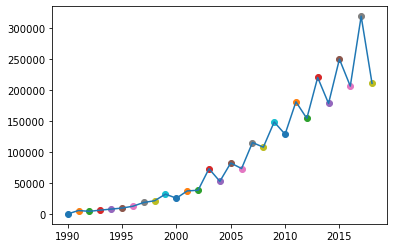

In [57]:
years = get_int_years_event()

prev = 0
asd = []
for y in years:
    
    # change the value of prev to the total number of collaborations in the previous year
    if(y!=1990):
        prev = total_colls_by_year[years.index(int(y)-1)]
        
    # subtract the current total number of collaboration the the precedent one to get the number of new collaborations in the given year
    num_new_collabs = total_colls_by_year[years.index(y)] - prev
    asd.append(num_new_collabs)
    
    # plot points
    plt.scatter(y,  num_new_collabs, label=str(y) + " -> " + str(num_new_collabs))

#plot the line that connect the points
plt.plot(years, asd)

#### for ACTIVE

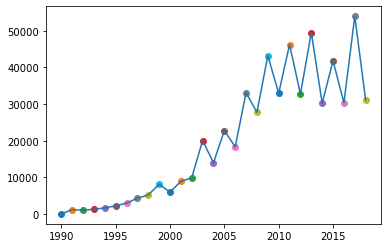

In [58]:
years = get_int_years_event()

prev = 0
asd = []
for y in years:
    
    # change the value of prev to the total number of collaborations in the previous year
    if(y!=1990):
        prev = active_total_colls_by_year[years.index(int(y)-1)]
        
    # subtract the current total number of collaboration the the precedent one to get the number of new collaborations in the given year
    num_new_collabs = active_total_colls_by_year[years.index(y)] - prev
    asd.append(num_new_collabs)
    
    # plot points
    plt.scatter(y,  num_new_collabs, label=str(y) + " -> " + str(num_new_collabs))

#plot the line that connect the points
plt.plot(years, asd)